# PyTorch Architecture Demonstration

This notebook demonstrates the new PyTorch-based RL agents on two different environments: the standard `CartPole-v1` and the custom `MinorityGame1vN_env` from this repository.

## 1. Setup

Import necessary libraries and add the project root to the system path to locate our custom modules.

In [1]:
import sys
import os
import numpy as np
import torch
import gymnasium as gym
import matplotlib.pyplot as plt

# Add the root directory to the Python path
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.append(project_root)

from pytorch_arch.agents.ppo import PytorchAgentPPO
from minoritygame.minority_env import MinorityGame1vN_env

%matplotlib inline

/app/minoritygame/minority_env.py:33: SyntaxWarning: invalid escape sequence '\i'
  p : float \in [0,1] (default:0.5)


## 2. Experiment 1: CartPole-v1

Here we will train the PPO agent on the classic `CartPole-v1` environment. The goal is to balance a pole on a cart. An episode ends when the pole falls over or after 500 timesteps. The environment is considered solved if the average reward over 100 consecutive episodes is 475 or greater.

In [2]:
# Configuration
EPISODES_CP = 300

# Setup environment
env_cartpole = gym.make('CartPole-v1')

# Setup agent
config_cp = {
    'lrp': 1e-3,
    'ent_decay': 1e-4,
    'ppo_epochs': 10,
    'clip_range': 0.2,
}

agent_cp = PytorchAgentPPO(
    name="ppo_cartpole_demo",
    env=env_cartpole,
    config=config_cp,
    max_episode_length=500
)

# Training loop
rewards_cp = []
print(f"Training on CartPole for {EPISODES_CP} episodes...")
for i in range(EPISODES_CP):
    agent_cp.play()
    if agent_cp.episode_length() > 0:
        stats = agent_cp.train(gamma=0.99)
    rewards_cp.append(agent_cp.last_total_return)
    if (i+1) % 50 == 0:
        avg_reward = np.mean(rewards_cp[-50:])
        print(f"Episode {i+1}/{EPISODES_CP} - Avg Reward (last 50): {avg_reward:.2f}")

print("\nTraining finished.")

Training on CartPole for 300 episodes...


Episode 50/300 - Avg Reward (last 50): 0.40


Episode 100/300 - Avg Reward (last 50): -1.84


Episode 150/300 - Avg Reward (last 50): -1.56


Episode 200/300 - Avg Reward (last 50): -1.76


Episode 250/300 - Avg Reward (last 50): -1.64


Episode 300/300 - Avg Reward (last 50): -1.74

Training finished.


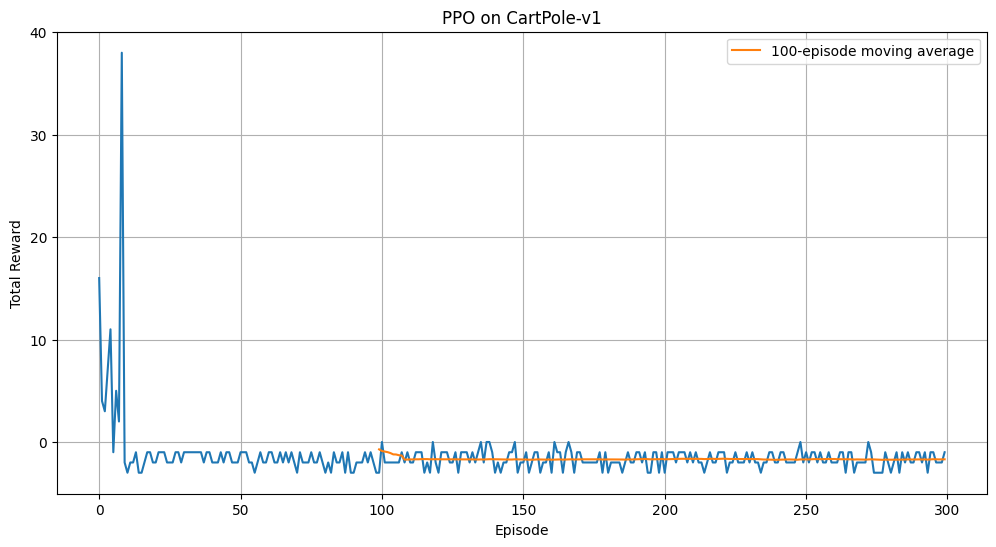

In [3]:
# Plotting results for CartPole
plt.figure(figsize=(12, 6))
plt.plot(rewards_cp)
plt.title('PPO on CartPole-v1')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
moving_avg = np.convolve(rewards_cp, np.ones(100)/100, mode='valid')
plt.plot(np.arange(99, len(rewards_cp)), moving_avg, label='100-episode moving average')
plt.legend()
plt.grid(True)
plt.show()

## 3. Experiment 2: Minority Game

Now we train the PPO agent on the custom `MinorityGame1vN_env`. In this game, an odd number of agents must choose between two sides (0 or 1) each turn. The agents on the minority side win a point. The state is the history of the last `m` winning sides.

In [4]:
# Configuration
EPISODES_MG = 300

# Setup environment
env_mgame = MinorityGame1vN_env(nagents=101, m=5, s=2)

# Setup agent
config_mg = {
    'lrp': 1e-3,
    'ent_decay': 1e-3,
    'ppo_epochs': 5,
    'clip_range': 0.2,
}

agent_mg = PytorchAgentPPO(
    name="ppo_mgame_demo",
    env=env_mgame,
    config=config_mg,
    max_episode_length=200,
    latent_dim=32
)

# Training loop
rewards_mg = []
print(f"\nTraining on Minority Game for {EPISODES_MG} episodes...")
for i in range(EPISODES_MG):
    agent_mg.play()
    if agent_mg.episode_length() > 0:
        stats = agent_mg.train(gamma=0.95)
    rewards_mg.append(agent_mg.last_total_return)
    if (i+1) % 50 == 0:
        avg_reward = np.mean(rewards_mg[-50:])
        print(f"Episode {i+1}/{EPISODES_MG} - Avg Reward (last 50): {avg_reward:.2f}")

print("\nTraining finished.")


Training on Minority Game for 300 episodes...


Episode 50/300 - Avg Reward (last 50): 85.78


Episode 100/300 - Avg Reward (last 50): 88.34


Episode 150/300 - Avg Reward (last 50): 85.98


Episode 200/300 - Avg Reward (last 50): 87.08


Episode 250/300 - Avg Reward (last 50): 92.26


Episode 300/300 - Avg Reward (last 50): 96.00

Training finished.


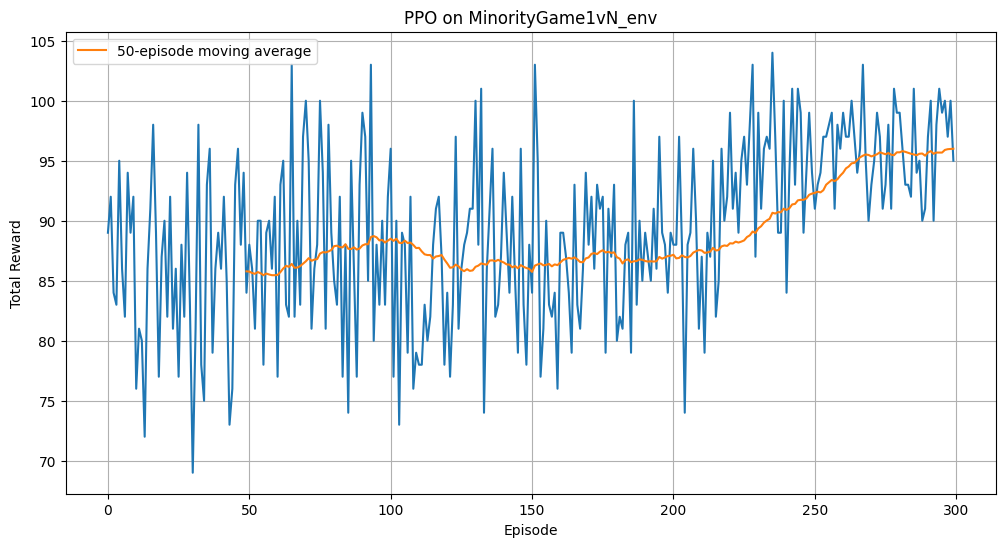

In [5]:
# Plotting results for Minority Game
plt.figure(figsize=(12, 6))
plt.plot(rewards_mg)
plt.title('PPO on MinorityGame1vN_env')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
moving_avg_mg = np.convolve(rewards_mg, np.ones(50)/50, mode='valid')
plt.plot(np.arange(49, len(rewards_mg)), moving_avg_mg, label='50-episode moving average')
plt.legend()
plt.grid(True)
plt.show()